# Dodatni izziv

Naloga je nadaljevanje domače naloge [Prepovedana števila](https://github.com/janezd/predavanja/blob/master/p1/domace-naloge/2020/03%20prepovedani%20intervali/resitev.ipynb), v kateri je bil podan seznam intervalov števil, ki so prepovedana, recimo,

In [8]:
prepovedani = [
    (12, 18),
    (2, 5),
    (3, 8),
    (0, 4),
    (15, 19),
    (6, 9),
    (13, 17),
    (4, 8)
]

Naloga: napiši program, ki pove, koliko je vseh dovoljenih števil med 0 in največjo zgornjo mejo. V gornjem primeru mora izpisati 2, saj sta dovoljeni dve števili, 10 in 11.

Za začetek lahko poskušaš z manjšim številom intervalov, kot je recimo seznam iz "redne" domače naloge. Potem pa se spopadi z intervali iz datoteke *intervali.txt*, ki je v priponki naloge.

Branja datotek se še nismo učili. Lahko se potrudiš sam(a), lahko pa uporabiš naslednjo vrstico:

In [9]:
intervali = [tuple(int(x) for x in vrstica.split("-")) for vrstica in open("intervali112.txt")]

Še en zanimiv izziv je naslednji: recimo, da tvoj računalnik ne bi imel niti toliko pomnilnika, da bi lahko shranil celotno tabelo intervalov. Če hočeš večkrat prek tabele, moraš večkrat odpreti datoteko in jo brati. Z drugimi besedami: nimamo seznamov (ali terk, slovarjev, množic ...), le posamične int-e in datoteke (ter, očitno, niz s posamično vrstico, ki jo dobiš iz datoteke, ter seznam z dvema nizoma, ki ga vrne `split` te vrstice). Napiši program, ki kljub tem omejitvam v doglednem času reši nalogo. Recimo tako, da čim manjkrat prebere datoteko.

## Rešitev


### Naivna rešitev: množice, prečrtavanje

Pa začnimo z naivno strategijo: pripravimo množico vseh prepovedanih števil. (Če še ne veste za množice, se ne vznemirjajte: pri tej nalogi nas ne bodo pripeljale nikamor.) Za mali nabor intervalov. Dovoljeno je potem vse, kar ni prepovedano.

V spremenljivki `prepovedani` imamo še vedno mali seznam intervalov. Velikega smo naložili v `intervali`.

In [10]:
prep_st = set()
for od, do in prepovedani:
    for i in range(od, do + 1):
        prep_st.add(i)
print(max(prep_st) + 1 - len(prep_st))

2


K `max(prep_st)`, to je, največji zgornji meji, smo prišteli 1. Če je zgornja meja 5, se pogovarjamo o šestih številih, namreč 0, 1, 2, 3, 4 in 5.

Naredimo lahko tudi obratno. Seznam, katerega i-ti element bo `True`-jev, če je število dovoljeno. V začetku so v intervalu sami `True`-ji, potem pa gremo čez intervale in črtamo vse, kar je v njih. Na koncu preprosto seštejemo elemente seznama, saj je `True` enak `1` in `False` enak 0.

In [11]:
meja = 0
for od, do in prepovedani:
    if do > meja:
        meja = do
        
dovoljeni = [True] * (meja + 1)
for od, do in prepovedani:
    for i in range(od, do + 1):
        dovoljeni[i] = False
print(sum(dovoljeni))

2


Zdaj pa lahko poskusite pognati isti program na velikem seznamu intervalov. Se vidimo drugo leto.

Aha, pa kakšnih 32 GB pomnilnika boste potrebovali, ker Pythonov `int` ni tako majhna zadeva.

Seveda se bo tu kdo domislil `numpy`-ja.

Ne `dtype=np.byte` ne `dtype=bool` nas ne bosta rešila. S prvim bi porabili "le" 4 GB pomnilnika in z drugim 500 MB. A tudi numpy ne more tako hitro zapisovati v pomnilnik tisoč ogromnih intervalov.

### Urejeni intervali

Trik, ki ga je potrebno uporabiti, je relativno očiten: intervale uredimo. Nato bomo v spremenljivko `prvo_dovoljeno` bomo beležili, katero je prvo število, ki bi utegnilo biti dovoljeno (ker v resnici je ali pa še nismo naleteli na interval, ki bi ga prepovedoval). Sprehodimo se po intervalih. Pri vsakem preverimo, ali je med `prvo_dovoljeno` in spodnjo mejo naslednjega prepovedanega intervala kaj prostora. Če je, so ta števila dovoljena. Nato pa `prvo_dovoljeno` dvignemo onstren gornje meje intervala - razen, če je `prvo_dovoljeno` že zdaj višja od te meje.

In [12]:
prvo_dovoljeno = 0
dovoljenih = 0

for od, do in sorted(intervali):
    if od > prvo_dovoljeno:
        dovoljenih += od - prvo_dovoljeno
    if do >= prvo_dovoljeno:
        prvo_dovoljeno = do + 1
        
print(dovoljenih)

112


Na enak način bi lahko tudi hitro našli prvo dovoljeno število.

In [13]:
prvo_dovoljeno = 0

for od, do in sorted(intervali):
    if od > prvo_dovoljeno:
        print(prvo_dovoljeno)
        break
    if do >= prvo_dovoljeno:
        prvo_dovoljeno = do + 1


22887907


Najpočasnejši del tega programa je urejanje. Časovna zahtevnost je sorazmerna $k\ln k$, kjer je $k$ število intervalov.

### Pometanje

Tole pa je prisrčen trik, ki se ga je spomnil - pozabil sem kdo, morda eden od asistentov morda eden od študentov Pedagoške fakultete, ki jih včasih morim s to nalogo. Recimo, da bi za vsako število radi vedeli, kolikokrat je prepovedano.

In [12]:
from collections import defaultdict

deltas = defaultdict(int)
for od, do in prepovedani:
    deltas[od] += 1
    deltas[do + 1] -= 1

deltas = sorted(deltas.items())
print(deltas)

[(0, 1), (2, 1), (3, 1), (4, 1), (5, -1), (6, 0), (9, -2), (10, -1), (12, 1), (13, 1), (15, 1), (18, -1), (19, -1), (20, -1)]


Tole pove, da imamo začetke intervalov pri 0, 2, 3 in 4 - število 4 je torej prepovedano kar štirikrat. Pri 4 je enega intervala konec, vendar se tam takoj začne naslednji, torej je sprememba enaka 0. Pri 5 se en interval konča, torej je 6 prepovedano samo trikrat. Pri  (zato `(5, -1)`), torej je 5 prepovedana samo trikrat. Potem se en interval zaključi pri 5, vendar se pri 6 začne novi, tako da je sprememba pri 6 enaka 0. Pri 8 se končata dva intervala (torej je 9 prepovedana samo še enkrat) in pri 9 se konča še en interval - torej je število 10 dovoljeno! Pa 11 tudi, saj je naslednja prepoved šele pri 12.

Gornje lahko tudi narišemo - program za risanje pa naj razume, kdor hoče.

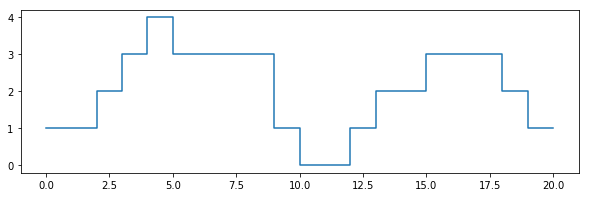

In [13]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"]=10,3


x, delta = np.array(deltas).T
y = np.cumsum(delta)
x = np.vstack((x[:-1], x[1:])).T.flatten()
y = np.vstack((y, y)).T.flatten()[:-2]
pyplot.plot(x, y)

In [14]:
prepovedanost = 0
for x, delta in deltas:
    prepovedanost += delta
    if prepovedanost == 0:
        print("Prvo dovoljeno število je", x)
        break

Prvo dovoljeno število je 10


Če želimo izvedeti število vseh dovoljenih števil, pa imamo

In [15]:
dovoljenih = 0
prepovedanost = 0
for (x, delta), (x1, _) in zip(deltas, deltas[1:]):
    prepovedanost += delta
    if prepovedanost == 0:
        dovoljenih = x1 - x
print(dovoljenih)

2


Vse to lahko preskusimo tudi na velikem seznamu velikih intervalov.

In [16]:
intervali = [tuple(int(x) for x in vrstica.split("-")) for vrstica in open("intervali.txt")]

from collections import defaultdict

deltas = defaultdict(int)
for od, do in intervali:
    deltas[od] += 1
    deltas[do + 1] -= 1

deltas = sorted(deltas.items())

dovoljenih = 0
prepovedanost = 0
for (x, delta), (x1, _) in zip(deltas, deltas[1:]):
    prepovedanost += delta
    if prepovedanost == 0:
        dovoljenih += x1 - x

print(dovoljenih)

109


Rešitev ima enako časovno zahtevnost kot prejšnja. Prej smo uredili $k$ intervalov, zdaj uredimo $2k$ meja. To je isto.

### Naj drugi delajo namesto mene

Takole se je lotil eden od študentov: našel je modul python-intervals. Spodnje je bistvo njegovega programa (z nekaj kozmetičnimi spremembami).

```python
# Za to, da lahko uvozimo ta modul, moramo namestiti knjižnico python-intervals
from intervals import closed as interval

prepovedani = interval(intervali[0][0], intervali[0][1])
for od, do in intervali:
    prepovedani = prepovedani | interval(od, do)

dovoljeni = interval(0, prepovedani.upper) - prepovedani
count = 0
for i in dovoljeni:
    count += i.upper - i.lower - 1
```

V prvem delu sestavimo "interval" (tak, po odsekih), ki združuje vse prepovedane intervale. V drugem delu izračunamo njegov komplement in seštejemo dolžine njegovih kosov.

Še krajše je, če si pomagamo s par funkcijami drugih Pythonovih modulom in znanjem, ki ga bomo dobili čez par tednov.

```python
from intervals import closed as interval, Interval
from functools import reduce

prepovedani = reduce(Interval.union, (interval(od, do) for od, do in intervali))
dovoljeni = (~prepovedani)[1:-1]
count = sum(i.upper - i.lower - 1 for i in dovoljeni)
```

To je seveda odličen pristop. Če dobimo (zanesljiv) modul, si seveda prihranimo delo, tako da ni potrebno pisati nam. Seveda gre tu za različna znanja: avtor te rešitve ni programiral, pač pa se je naučil poiskati in uporabiti nekaj, kar že obstaja. Tudi to je dobro. Pozdravljam idejo.

### Numpy

Glede na to, da smo si na dodatnih predavanjih ogledali `numpy`, napišimo še rešitev z njim.

In [17]:
from collections import defaultdict
import numpy as np

deltas = defaultdict(int)
for od, do in intervali:
    deltas[od] += 1
    deltas[do + 1] -= 1

deltas = sorted(deltas.items())
x, delta = np.array(deltas).T
y = np.cumsum(delta)

cs = np.flatnonzero(y == 0)[:-1]
dovoljenih = np.sum(x[cs + 1] - x[cs])
print(dovoljenih)

109


Začetek že poznamo. `x` in `y` vsebujeta tisto, kar kaže oni graf. S `cs = np.flatnonzero(y == 0)` dobimo indekse elementov v `y`, pri katerih `y == 0` vrne `True` - torej indekse elementov `y`, ki so enaki 0. Te indekse uporabimo v `x`: `x[cs]` so `x`-i, pri katerih je `y` enak 0 - torej začetki regij dovoljenih števil. `x[cs + 1]` so elementi `x` z naslednjimi indeksi, torej tisti elementi `x`, ki sledijo elementom `x[cs]`. Zato so `x[cs + 1] - x[cs]` širine regij dovoljenih števil. Te širine moramo sešteti, pa dobimo število dovoljenih števil.

Čemu `[:-1]` pri `flatnonzero`? Zato ker se `y` vedno konča z 0, vendar to ustreza največji zgornji meji in od tam naprej je tako ali tako vse dovoljeno, tako da te, zadnje meje ne upoštevamo več.

### Rešitev, če nimamo dovolj pomnilnika

Ozadje tega dodatka je takšno: Advent of Code sem tisto leto reševal na mikrokontrolerju Arduino Uno. Tale [dolgočasni video](https://www.youtube.com/watch?v=XgQm8j2wXA4&list=PLm-JYoU3uw-aIWvjuzHk2KOQSjLQT6Ac-&index=30&ab_channel=JanezDemsar) kaže, kako Arduino rešuje tale dodatni izziv.

Arduino ima 2 KB RAM-a, poleg tega pa še 32 KB EEPROMa, v katerega lahko shranimo program in podatke. Problem: 1005 intervalov, torej 2010 4-bajtnih števil, zahteva 8040 bajtov pomnilnika. To seveda gre v EEPROM. Vendar lahko Arduinov program spreminja le vsebino RAM-a. Vsebino EEPROMa zapišemo, ko na Arduina naložimo program. To pomeni, da na Arduinu ni mogoče sortirati seznama intervalov. Seveda bi lahko intervale sortiral prej, preden jih naložim na Arduina. Vendar tega ne bi počel ročno, temveč v Pythonu. In to bi bila goljufija: če rešujemo na Arduinu, ne moremo polovice narediti prej na računalniku. Potrebno je bilo torej sestaviti postopek, ki deluje sorazmerno hitro tudi z neurejenimi intervali.

Kar se tiče hitrosti programa samega: Arduina sicer programiramo v C-ju oz. C++ (in v ničemer drugem, pozabite na Python in podobna udobja). Vendar je njegov procesor zelo zelo počasen.

V dodatni izziv sem sicer napisal, da podatke vedno znova beremo iz datoteke. Tako sem se "izrazil", ker nisem hotel napisati, da jih ne smete urejati, saj bi vam s tem izdal, da je urejanje smiselno in tako pokvaril prvi del naloge. V rešitvi pa jih ne bomo vsakič znova brali iz datoteke, temveč bomo vedno znova prehajali prek istega, neurejenega seznama. Saj ni razlike.

Ideja bo relativno preprosta. Najprej poiščimo prvo dovoljeno število. Predpostavimo, da je 0 dovoljeno. Če naletimo na interval, ki to število prepoveduje, predpostavimo, da je dovoljeno število, ki je za 1 večje od zgornje meje tega intervala. Spet pregledamo intervale; če naletimo na interval, ki ga prepoveduje ... in tako naprej.

In [18]:
kandidat = 0
while True:
    for od, do in intervali:
        if od <= kandidat <= do:
            kandidat = do + 1
            break
    else:
        break

print(kandidat)

22887907


Število dovoljenih števil poiščemo tako, da za vsakega kandidata za dovoljeno število poiščemo, kateri interval ima najmanjšo zgornjo mejo, ki je nad njim. Če se vmes izkaže, da je kandidat prepovedan, potem pač nadaljujemo z naslednjim. Če je kandidat v resnici dovoljeno število, pa k številu dovoljenih števil prištejemo razliko med tem številom in prvim naslednjim prepovedanim intervalom.

In [19]:
kandidat = 0
dovoljenih = 0
while True:
    zgoraj = None
    for od, do in intervali:
        if od <= kandidat <= do:
            kandidat = do + 1
            break
        elif kandidat < od and (zgoraj == None or od < zgoraj):
            zgoraj = od
            naprej = do + 1
    else:
        if zgoraj == None:
            break
        dovoljenih += zgoraj - kandidat
        kandidat = naprej
print(dovoljenih)

109


Koliko časa zahteva ta program? Zanka `for` gre čez `k` intervalov. Vsakič poveča vrednost `kandidat` na neko višjo gornjo mejo, zato se bo `while` obrnila največ `k` krat. Čas izvajanja je torej sorazmeren $k^2$.